In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv("auto.csv") 
data.head(10)

symboling  normalized-losses         make fuel-type aspiration  \
0          3                164  alfa-romero       gas        std   
1          3                164  alfa-romero       gas        std   
2          1                164  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   
5          2                158         audi       gas        std   
6          1                158         audi       gas        std   
7          1                158         audi       gas        std   
8          1                158         audi       gas      turbo   
9          0                192         audi       gas      turbo   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   
5          two        sedan          fwd           front        99.8  ...   
6         four        sedan          fwd           front       105.8  ...   
7         four        wagon          fwd           front       105.8  ...   
8         four        sedan          fwd           front       105.8  ...   
9          two    hatchback          4wd           front        99.5  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   
5          136         mpfi  3.19    3.40               8.5        110   
6          136         mpfi  3.19    3.40               8.5        110   
7          136         mpfi  3.19    3.40               8.5        110   
8          131         mpfi  3.13    3.40               8.3        140   
9          131         mpfi  3.13    3.40               7.0        160   

   peak-rpm city-mpg  highway-mpg  price  
0      5000       21           27  13495  
1      5000       21           27  16500  
2      5000       19           26  16500  
3      5500       24           30  13950  
4      5500       18           22  17450  
5      5500       19           25  15250  
6      5500       19           25  17710  
7      5500       19           25  18920  
8      5500       17           20  23875  
9      5500       16           22  23875  

[10 rows x 26 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [16]:
data.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         126.365854   98.756585  174.049268   65.907805   
std      1.245307          35.438400    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   126.907317    3.324878    3.253366   
std      2.443522   520.680204    41.642693    0.273049    0.313937   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.130000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.580000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  205.000000   205.000000  205.000000   205.000000   
mean           10.142537  106.048780  5131.463415   25.219512    30.751220   
std             3.972040   43.468803   480.933330    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  120.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    205.000000  
mean   13312.712195  
std     8102.472461  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16503.000000  
max    45400.000000

In [13]:
data.drop(['fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'],axis = 1).groupby('make').describe()

symboling                                                 \
                  count      mean       std  min   25%  50%   75%  max   
make                                                                     
alfa-romero         3.0  2.333333  1.154701  1.0  2.00  3.0  3.00  3.0   
audi                7.0  1.285714  0.755929  0.0  1.00  1.0  2.00  2.0   
bmw                 8.0  0.375000  0.744024  0.0  0.00  0.0  0.25  2.0   
chevrolet           3.0  1.000000  1.000000  0.0  0.50  1.0  1.50  2.0   
dodge               9.0  1.000000  1.000000 -1.0  1.00  1.0  1.00  3.0   
honda              13.0  0.615385  0.767948  0.0  0.00  0.0  1.00  2.0   
isuzu               4.0  0.750000  0.957427  0.0  0.00  0.5  1.25  2.0   
jaguar              3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
mazda              17.0  1.117647  1.166316  0.0  0.00  1.0  1.00  3.0   
mercedes-benz       8.0  0.000000  1.414214 -1.0 -1.00 -0.5  0.25  3.0   
mercury             1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
mitsubishi         13.0  1.846154  1.214232 -1.0  1.00  2.0  3.00  3.0   
nissan             18.0  1.000000  0.907485  0.0  0.25  1.0  1.00  3.0   
peugot             11.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
plymouth            7.0  1.000000  1.154701 -1.0  1.00  1.0  1.00  3.0   
porsche             5.0  2.600000  0.894427  1.0  3.00  3.0  3.00  3.0   
renault             2.0  1.000000  1.414214  0.0  0.50  1.0  1.50  2.0   
saab                6.0  2.500000  0.547723  2.0  2.00  2.5  3.00  3.0   
subaru             12.0  0.500000  0.904534  0.0  0.00  0.0  0.50  2.0   
toyota             32.0  0.562500  1.216486 -1.0  0.00  0.0  1.25  3.0   
volkswagen         12.0  1.666667  1.073087  0.0  1.50  2.0  2.00  3.0   
volvo              11.0 -1.272727  0.467099 -2.0 -1.50 -1.0 -1.00 -1.0   

              normalized-losses              ... highway-mpg       price  \
                          count        mean  ...         75%   max count   
make                                         ...                           
alfa-romero                 3.0  164.000000  ...       27.00  27.0   3.0   
audi                        7.0  164.571429  ...       25.00  30.0   7.0   
bmw                         8.0  155.500000  ...       28.25  29.0   8.0   
chevrolet                   3.0  100.000000  ...       48.00  53.0   3.0   
dodge                       9.0  133.444444  ...       38.00  41.0   9.0   
honda                      13.0  103.000000  ...       34.00  54.0  13.0   
isuzu                       4.0  145.000000  ...       43.00  43.0   4.0   
jaguar                      3.0  117.666667  ...       19.00  19.0   3.0   
mazda                      17.0  121.588235  ...       38.00  42.0  17.0   
mercedes-benz               8.0  122.250000  ...       25.00  25.0   8.0   
mercury                     1.0  161.000000  ...       24.00  24.0   1.0   
mitsubishi                 13.0  141.307692  ...       32.00  41.0  13.0   
nissan                     18.0  135.166667  ...       37.00  50.0  18.0   
peugot                     11.0  161.000000  ...       29.00  33.0  11.0   
plymouth                    7.0  137.142857  ...       38.00  41.0   7.0   
porsche                     5.0  157.200000  ...       27.00  28.0   5.0   
renault                     2.0  150.000000  ...       31.00  31.0   2.0   
saab                        6.0  127.000000  ...       28.00  28.0   6.0   
subaru                     12.0   92.250000  ...       32.25  37.0  12.0   
toyota                     32.0  110.656250  ...       36.25  47.0  32.0   
volkswagen                 12.0  127.916667  ...       39.00  46.0  12.0   
volvo                      11.0   91.454545  ...       28.00  28.0  11.0   

                                                                      \
                       mean          std      min       25%      50%   
make                                                                   
alfa-romero    15498.333333  1734.937559  1349

In [25]:
def stat_dataframe (data, name_group, name_stat):
    try:
        data_inside = data [[name_group,name_stat]]
    except:
        end = print('Неправильный тип данных или имя колонки')
        return end
    return data_inside.groupby(name_group).describe()    
    

In [26]:
data_make = stat_dataframe (data, 'make', 'peak-rpm')
data_make

peak-rpm                                                   \
                 count         mean         std     min     25%     50%   
make                                                                      
alfa-romero        3.0  5000.000000    0.000000  5000.0  5000.0  5000.0   
audi               7.0  5500.000000    0.000000  5500.0  5500.0  5500.0   
bmw                8.0  5068.750000  697.924218  4250.0  4250.0  5400.0   
chevrolet          3.0  5300.000000  173.205081  5100.0  5250.0  5400.0   
dodge              9.0  5388.888889  220.479276  5000.0  5500.0  5500.0   
honda             13.0  5753.846154  335.696750  4800.0  5800.0  5800.0   
isuzu              4.0  5150.000000  300.000000  4800.0  4950.0  5200.0   
jaguar             3.0  4833.333333  144.337567  4750.0  4750.0  4750.0   
mazda             17.0  5108.823529  545.503006  4200.0  4800.0  5000.0   
mercedes-benz      8.0  4487.500000  174.744712  4350.0  4350.0  4425.0   
mercury            1.0  5000.000000         NaN  5000.0  5000.0  5000.0   
mitsubishi        13.0  5269.230769  259.437261  5000.0  5000.0  5500.0   
nissan            18.0  5177.777778   94.280904  4800.0  5200.0  5200.0   
peugot            11.0  4668.181818  525.486787  4150.0  4150.0  5000.0   
plymouth           7.0  5357.142857  243.975018  5000.0  5250.0  5500.0   
porsche            5.0  5790.000000  174.642492  5500.0  5750.0  5900.0   
renault            2.0  5750.000000    0.000000  5750.0  5750.0  5750.0   
saab               6.0  5333.333333  129.099445  5250.0  5250.0  5250.0   
subaru            12.0  4775.000000  270.100991  4400.0  4700.0  4800.0   
toyota            32.0  4859.375000  530.282563  4200.0  4800.0  4800.0   
volkswagen        12.0  5154.166667  396.838835  4500.0  4800.0  5250.0   
volvo             11.0  5290.909091  207.145096  4800.0  5200.0  5400.0   

                               
                  75%     max  
make                           
alfa-romero    5000.0  5000.0  
audi           5500.0  5500.0  
bmw            5500.0  5800.0  
chevrolet      5400.0  5400.0  
dodge          5500.0  5500.0  
honda          6000.0  6000.0  
isuzu          5400.0  5400.0  
jaguar         4875.0  5000.0  
mazda          5000.0  6000.0  
mercedes-benz  4562.5  4750.0  
mercury        5000.0  5000.0  
mitsubishi     5500.0  5500.0  
nissan         5200.0  5200.0  
peugot         5000.0  5600.0  
plymouth       5500.0  5500.0  
porsche        5900.0  5900.0  
renault        5750.0  5750.0  
saab           5437.5  5500.0  
subaru         4825.0  5200.0  
toyota         4800.0  6600.0  
volkswagen     5500.0  5500.0  
volvo          5400.0  5500.0

In [29]:
data_make = stat_dataframe (data, 'make', 'fuel-type')
data_make

fuel-type                 
                  count unique  top freq
make                                    
alfa-romero           3      1  gas    3
audi                  7      1  gas    7
bmw                   8      1  gas    8
chevrolet             3      1  gas    3
dodge                 9      1  gas    9
honda                13      1  gas   13
isuzu                 4      1  gas    4
jaguar                3      1  gas    3
mazda                17      2  gas   15
mercedes-benz         8      2  gas    4
mercury               1      1  gas    1
mitsubishi           13      1  gas   13
nissan               18      2  gas   17
peugot               11      2  gas    6
plymouth              7      1  gas    7
porsche               5      1  gas    5
renault               2      1  gas    2
saab                  6      1  gas    6
subaru               12      1  gas   12
toyota               32      2  gas   29
volkswagen           12      2  gas    8
volvo                11      2  gas   10

In [31]:
data.select_dtypes(include = 'object').mode()

make fuel-type aspiration num-of-doors body-style drive-wheels  \
0  toyota       gas        std         four      sedan          fwd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front         ohc             four        mpfi

In [32]:
data_corr = data.corr()
data_corr

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.497890   -0.531954 -0.357612   
normalized-losses   0.497890           1.000000   -0.029810  0.051375   
wheel-base         -0.531954          -0.029810    1.000000  0.874587   
length             -0.357612           0.051375    0.874587  1.000000   
width              -0.232919           0.122172    0.795144  0.841118   
height             -0.541038          -0.332532    0.589435  0.491029   
curb-weight        -0.227691           0.152171    0.776386  0.877728   
engine-size        -0.105790           0.166203    0.569329  0.683360   
bore               -0.160225           0.013503    0.495108  0.608905   
stroke             -0.020132           0.038636    0.164549  0.132076   
compression-ratio  -0.178515          -0.148861    0.249786  0.158414   
horsepower          0.070421           0.274619    0.301696  0.521192   
peak-rpm            0.273125           0.234561   -0.363355 -0.279406   
city-mpg           -0.035823          -0.290161   -0.470414 -0.670909   
highway-mpg         0.034606          -0.256047   -0.544082 -0.704662   
price              -0.080149           0.199860    0.571784  0.678818   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.232919 -0.541038    -0.227691    -0.105790 -0.160225   
normalized-losses  0.122172 -0.332532     0.152171     0.166203  0.013503   
wheel-base         0.795144  0.589435     0.776386     0.569329  0.495108   
length             0.841118  0.491029     0.877728     0.683360  0.608905   
width              1.000000  0.279210     0.867032     0.735433  0.556374   
height             0.279210  1.000000     0.295572     0.067149  0.199995   
curb-weight        0.867032  0.295572     1.000000     0.850594  0.648219   
engine-size        0.735433  0.067149     0.850594     1.000000  0.602516   
bore               0.556374  0.199995     0.648219     0.602516  1.000000   
stroke             0.183379 -0.044176     0.170425     0.211477 -0.049492   
compression-ratio  0.181129  0.261214     0.151362     0.028971  0.008511   
horsepower         0.596251 -0.114968     0.679865     0.742119  0.537543   
peak-rpm          -0.214240 -0.322525    -0.264976    -0.241031 -0.276942   
city-mpg          -0.642704 -0.048640    -0.757414    -0.653658 -0.556570   
highway-mpg       -0.677218 -0.107358    -0.797465    -0.677470 -0.562065   
price              0.764977  0.112421     0.835657     0.870751  0.549438   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.020132          -0.178515    0.070421  0.273125   
normalized-losses  0.038636          -0.148861    0.274619  0.234561   
wheel-base         0.164549           0.249786    0.301696 -0.363355   
length             0.132076           0.158414    0.521192 -0.279406   
width              0.183379           0.181129    0.596251 -0.214240   
height            -0.044176           0.261214   -0.114968 -0.322525   
curb-weight        0.170425           0.151362    0.679865 -0.264976   
engine-size        0.211477           0.028971    0.742119 -0.241031   
bore              -0.049492           0.008511    0.537543 -0.276942   
stroke             1.000000           0.187134    0.164722 -0.051970   
compression-ratio  0.187134           1.000000   -0.202096 -0.436976   
horsepower         0.164722          -0.202096    1.000000  0.171390   
peak-rpm          -0.051970          -0.436976    0.171390  1.000000   
city-mpg          -0.033609           0.324701   -0.744246 -0.117108   
highway-mpg       -0.036502           0.265201   -0.699361 -0.053351   
price              0.079775           0.064381    0.725481 -0.083675   

                   city-mpg  highway-mpg     price  
symboling         -0.035823     0.034606 -0.080149  
normalized-losses -0.290161    -0.256047  0.199860  
wheel-base        -0.470414    -0.544082  0.571784  
length            -0.670909   

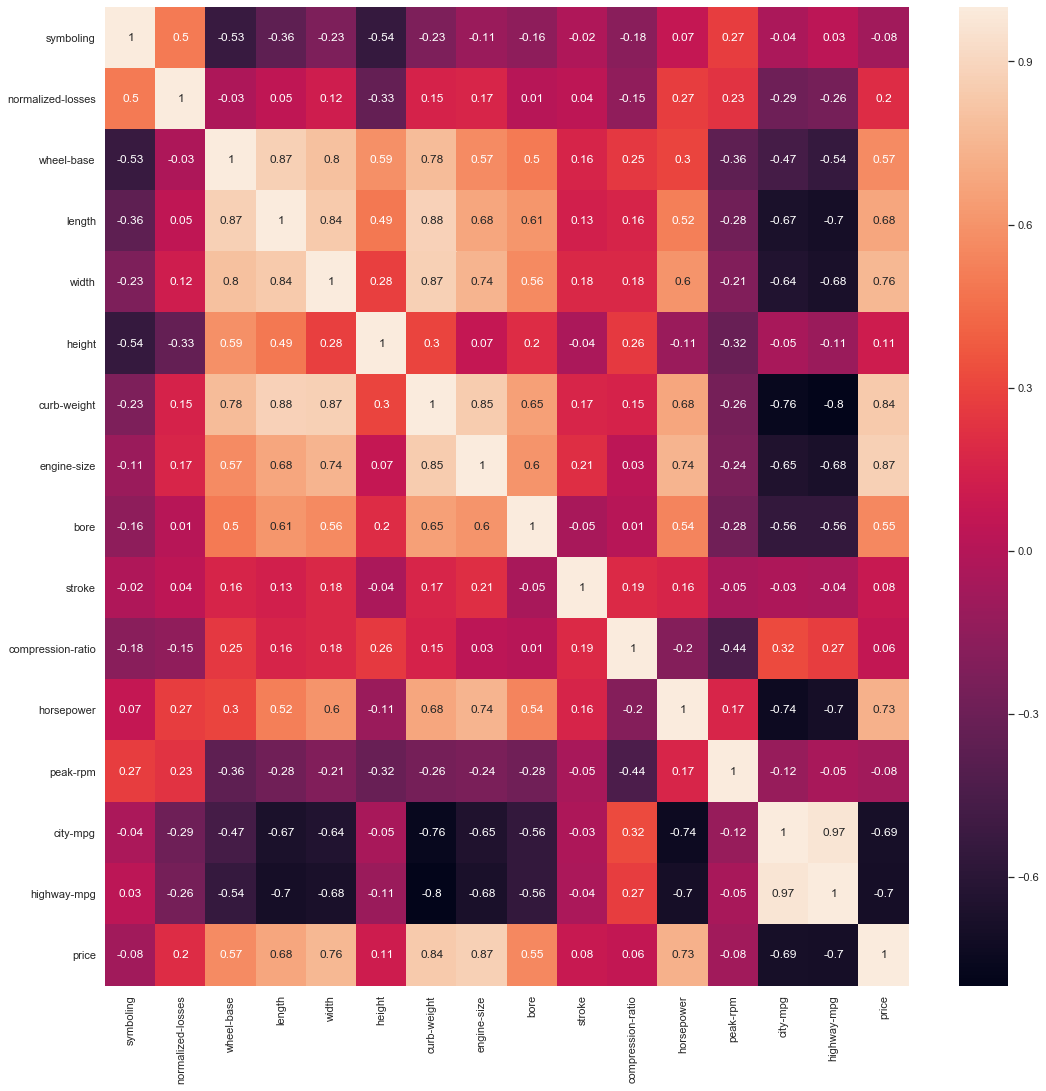

In [39]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [46]:
pip install pandas-profiling

  Stored in directory: C:\Users\Maxim\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\Maxim\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Maxim\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas_profiling
data.profile_report()

In [50]:
from scipy.stats import skew, kurtosis 

In [51]:
skew(data['price'])

1.7534486514523662

In [52]:
kurtosis(data['price'])

2.848082544390688

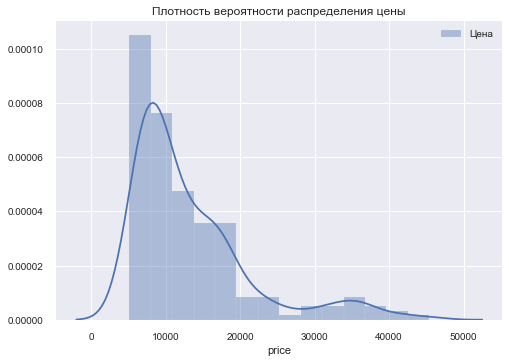

In [55]:
sns.distplot(data['price'])
plt.title('Плотность вероятности распределения цены')
plt.legend(['Цена'])
plt.show()

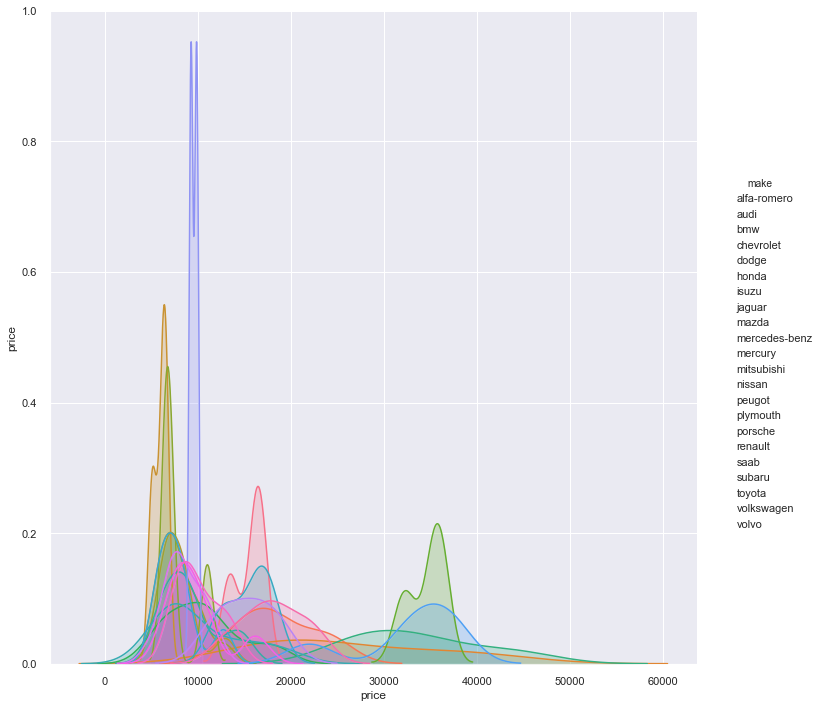

In [67]:
sns.pairplot(data=data[['make','price']], hue='make', height = 10)
plt.show()

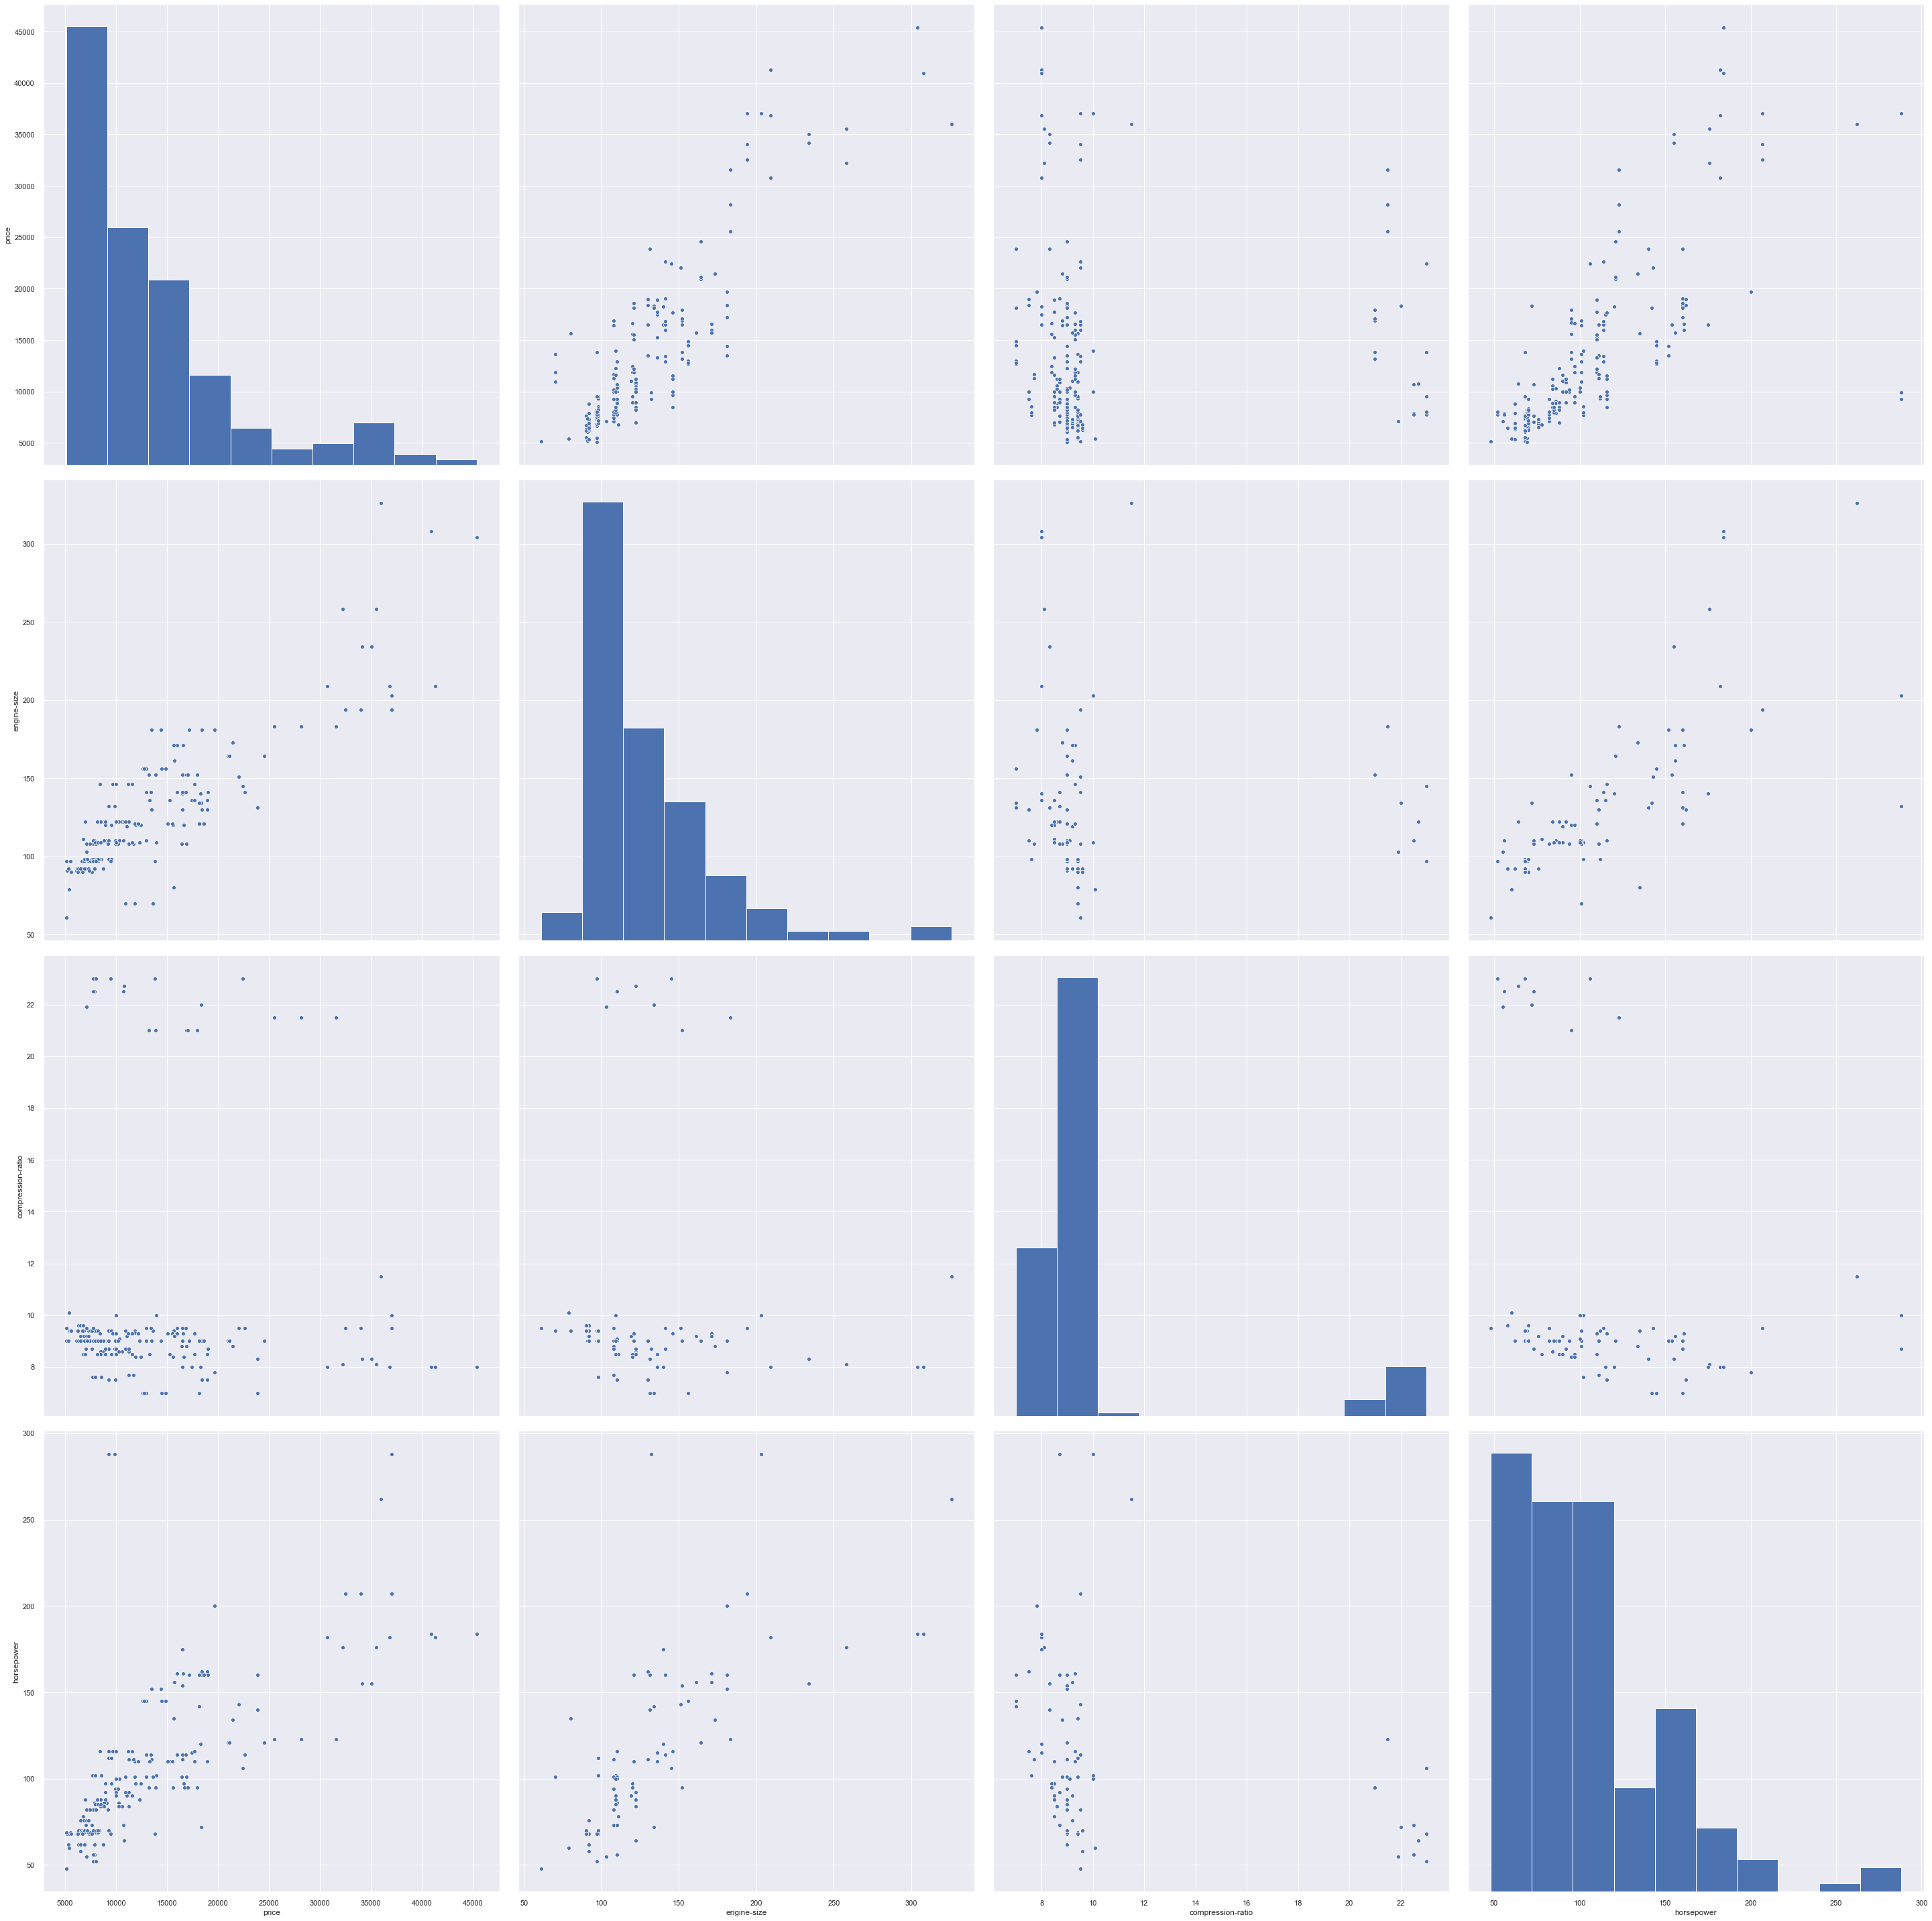

In [70]:
sns.pairplot(data, vars=['price','engine-size','compression-ratio','horsepower'], height = 10)
plt.show()

# Машина на бензине и дизеле имеет одинаковый объем двигателя

In [79]:
import statistics
from scipy.stats import ttest_ind

In [71]:
gas = data[data['fuel-type'] == 'gas']['engine-size']
diesel = data[data['fuel-type'] == 'diesel']['engine-size']

In [72]:
len(gas), len(diesel)

(185, 20)

In [73]:
gas = gas.sample(20)

In [76]:
statistics.variance(gas), statistics.variance(diesel)

(2073.7368421052633, 1031.378947368421)

In [84]:
stats.ttest_ind(gas, diesel, equal_var = False)

Ttest_indResult(statistic=-0.577841320686307, pvalue=0.567162025623859)

**Ответ, да объем одинаковый. Однако даже исходя из общих теоретических представлений это не так.  
Ошибка заключается скорее всего, что мы не учли мощность.  
Нулевая гипотеза должна была звучать следующим образом: "Машина на бензине и дизеле имеет одинаковый объем двигателя, при одинаковой мощности двигателя".  
К сожалению, у нас не будет возможности собрать такую статистику**

# Мощность не зависит от количества цилиндров

In [100]:
data_make = stat_dataframe (data, 'num-of-cylinders', 'horsepower')
data_make

horsepower                                              \
                      count        mean        std    min    25%    50%   
num-of-cylinders                                                          
eight                   5.0  193.200000  54.942697  155.0  155.0  184.0   
five                   11.0  122.454545  15.474906  110.0  110.0  123.0   
four                  159.0   93.037736  33.856340   52.0   69.0   86.0   
six                    24.0  161.916667  28.376225  106.0  152.0  160.0   
three                   1.0   48.000000        NaN   48.0   48.0   48.0   
twelve                  1.0  262.000000        NaN  262.0  262.0  262.0   
two                     4.0  109.500000  17.000000  101.0  101.0  101.0   

                                
                    75%    max  
num-of-cylinders                
eight             184.0  288.0  
five              123.0  160.0  
four              110.0  288.0  
six               182.0  207.0  
three              48.0   48.0  
twelve            262.0  262.0  
two               109.5  135.0

**К сожалению статистики маловато, можем сравнить 4 и 6 цилиндров**

In [90]:
four = data[data['num-of-cylinders'] == 'four']['horsepower']
six = data[data['num-of-cylinders'] == 'six']['horsepower']

In [91]:
four = four.sample(24)

In [93]:
statistics.variance(four), statistics.variance(six)

(792.0579710144928, 805.2101449275362)

In [95]:
stats.ttest_ind(four, six, equal_var = True)

Ttest_indResult(statistic=-8.733766530823258, pvalue=2.510361927705149e-11)

**Нулевая гипотеза отвергнута, мощность зависит от количества цилиндров, по крайней мере в случае 4-6**

# Мощность двигателя не зависит от типа аспирации

In [99]:
data_asp = stat_dataframe (data, 'aspiration', 'horsepower')
data_asp

horsepower                                                         
                count        mean       std   min     25%    50%    75%    max
aspiration                                                                    
std             168.0  102.000000  44.79307  48.0   69.75   88.0  114.0  288.0
turbo            37.0  124.432432  31.24059  68.0  102.00  123.0  145.0  200.0

In [104]:
standard = data[data['aspiration'] == 'std']['horsepower']
turbo = data[data['aspiration'] == 'turbo']['horsepower']

In [105]:
standard = standard.sample(37)

In [106]:
statistics.variance(standard), statistics.variance(turbo)

(1011.5285285285286, 975.9744744744745)

In [107]:
stats.ttest_ind(standard , turbo, equal_var = True)

Ttest_indResult(statistic=-3.2192854364422643, pvalue=0.0019285787663714151)

**Нулевая гипотеза отвергнута, мощность зависит от типа подачи топлива**

# Спасибо! Было очень интересно